In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

import gc

In [2]:
X = np.load("DATASETS/TimeSeriesTrimmed/X_train.npy")
X_ds = np.load("DATASETS/TimeSeriesTrimmedDS/X_train15.npy")

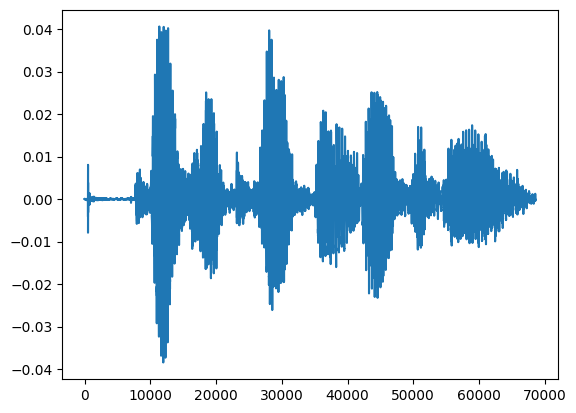

In [3]:
ts=X[0]
plt.plot(ts)

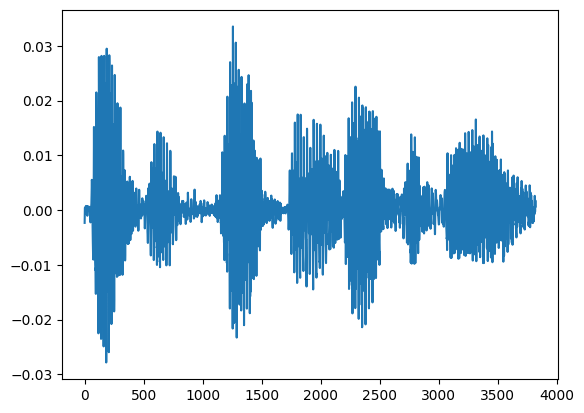

In [4]:
tsDS=X_ds[0]
plt.plot(tsDS)

## PAA

In [5]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [16]:
n_paa_segments = 1000
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)

X_paa = list()
X_paa_inv = list()
for ts in tqdm(X):
    ts = ts[~np.isnan(ts)].reshape(1,-1)
    ts_paa = paa.fit_transform(ts).squeeze()
    ts_paa_inv = paa.inverse_transform(ts_paa.reshape(1,-1))
    X_paa.append(ts_paa)
    X_paa_inv.append(ts_paa_inv)

# del X
# gc.collect()

  0%|          | 0/1828 [00:00<?, ?it/s]

C:\Users\andri\AppData\Roaming\Python\Python310\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
C:\Users\andri\AppData\Roaming\Python\Python310\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
C:\Users\andri\AppData\Roaming\Python\Python310\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
C:\Users\andri\AppData\Roaming\Python\Python310\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
C:\Users\andri\AppData\Roaming\Python\Py

KeyboardInterrupt: 

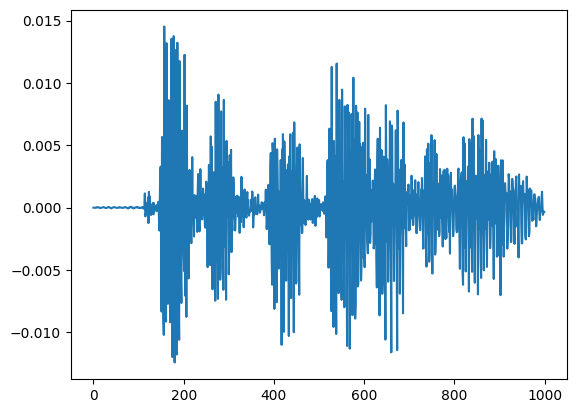

In [8]:
plt.plot(ts_paa.ravel())
plt.show()

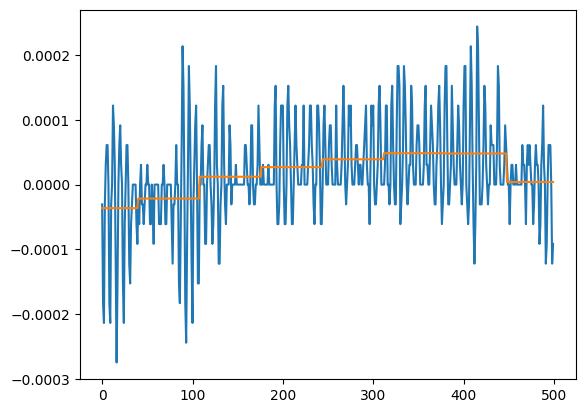

In [16]:
plt.plot(ts[2000:2500].ravel())
plt.plot(paa_dataset_inv[0][2000:2500].ravel())
plt.show()

## SAX

In [20]:
n_sax_symbols = 64
segments= 1000
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, 
                                     alphabet_size_avg=n_sax_symbols,
                                    scale=True)
ts_sax = sax.fit_transform(X)
sax_dataset_inv = sax.inverse_transform(ts_sax)

D:\Python\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [21]:
ts_sax

array([[[31],
        [31],
        [31],
        [31],
        [31],
        [31],
        [31],
        [32],
        [32],
        [32],
        [32],
        [32],
        [31],
        [31],
        [31],
        [31],
        [31],
        [31],
        [31],
        [32],
        [32],
        [32],
        [32],
        [32],
        [32],
        [32],
        [31],
        [31],
        [31],
        [31],
        [31],
        [32],
        [32],
        [32],
        [32],
        [32],
        [32],
        [31],
        [31],
        [31],
        [31],
        [31],
        [31],
        [32],
        [32],
        [32],
        [32],
        [32],
        [32],
        [31],
        [31],
        [31],
        [31],
        [31],
        [31],
        [31],
        [32],
        [32],
        [32],
        [32],
        [32],
        [31],
        [31],
        [31],
        [31],
        [31],
        [31],
        [31],
        [31],
        [32],
        [32],
      

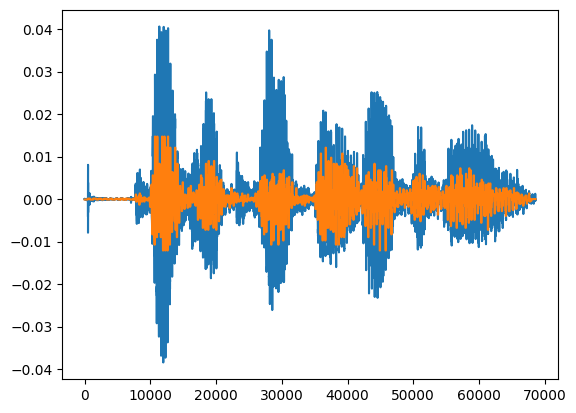

In [22]:
#plt.plot(ts.ravel())
plt.plot(ts.ravel())
plt.plot(sax_dataset_inv.ravel())
plt.show()

In [28]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts.reshape(1,-1))
# ts = ts.reshape(1,-1)

In [29]:
ts.shape

(1, 68608, 1)

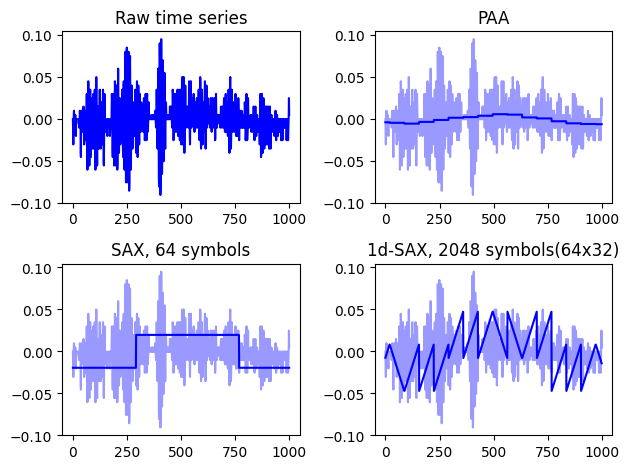

In [31]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 1000
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(ts)
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 64
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, 
                                     alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_dataset_inv = sax.inverse_transform(ts_sax)

# 1d-SAX transform
n_sax_symbols_avg = 64
n_sax_symbols_slope = 32
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

ts_sax1d = one_d_sax.fit_transform(ts)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(ts_sax1d)

plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(ts[0][1000:2000].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(ts[0][1000:2000].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0][1000:2000].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(ts[0][1000:2000].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0][1000:2000].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(ts[0][1000:2000].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0][1000:2000].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()